COMPRNSION DE LOS DATOS 

In [66]:
# importar librerías
import sys
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import sklearn  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings 
import session_info 


# Configurar parámetros para gráficas
plt.rcParams.update(plt.rcParamsDefault) # restore parameters
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200 
%matplotlib inline

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Configurar visualización de dataframes
# pd.reset_option('^display.', silent=True) # reset_option('all')
pd.options.display.max_columns = None

np.random.seed(43)

# Imprimir información de la sesión
session_info.show()

In [63]:
#leer los datos
df = pd.read_csv('USvideos_cc50_202101.csv')
df.shape

(40949, 20)

In [62]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

ANALISIS DESCRIPTIVO DE LOS DATOS 

In [26]:
#Total de registros por tipos de variables
df.dtypes.value_counts()

object     10
int64       5
bool        3
float64     2
Name: count, dtype: int64

LEER LAS COLUMNAS

In [67]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry'],
      dtype='object')

1. HALLAMOS DATOS ESTADISTICOS PARA LAS VARIAVLES NUEMERICAS

In [68]:
#leer columnas de varibles numericas
df.select_dtypes(np.number).columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'lat',
       'lon'],
      dtype='object')

In [69]:
#Describimos datos estadisticos de las variables numeriucas
df.describe(include=np.number)

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,39.660944,-93.741838
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,6.589701,19.034596
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,19.741755,-155.844437
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,35.860119,-105.358887
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,39.833851,-90.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,44.000000,-80.500000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,66.160507,-68.972168


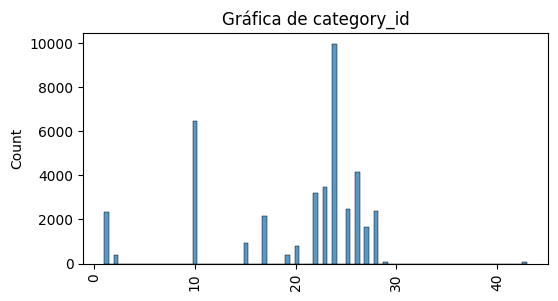

In [86]:
#Graficar destribucion de una varible numerica
plt.figure(figsize=(6, 3), dpi= 100)

sns.histplot(x='category_id', data=df).set(title=f'Gráfica de category_id', xlabel=None)
plt.xticks(rotation=90)

plt.show()

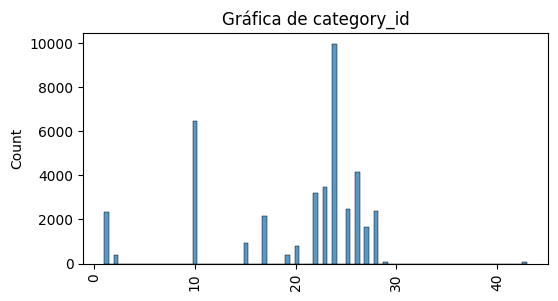

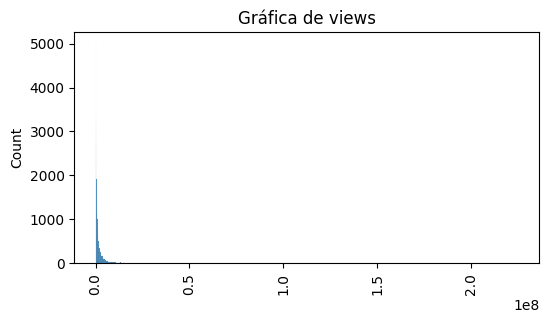

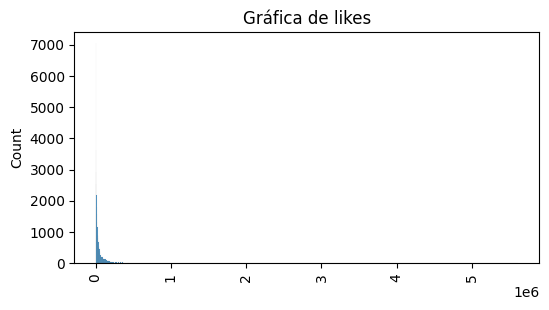

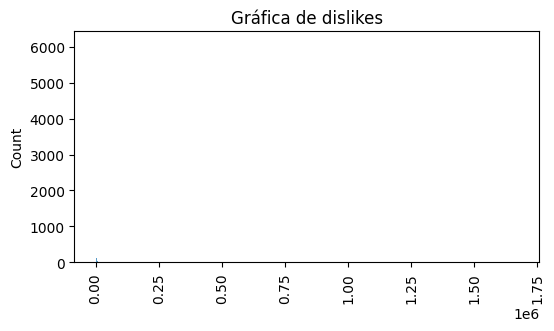

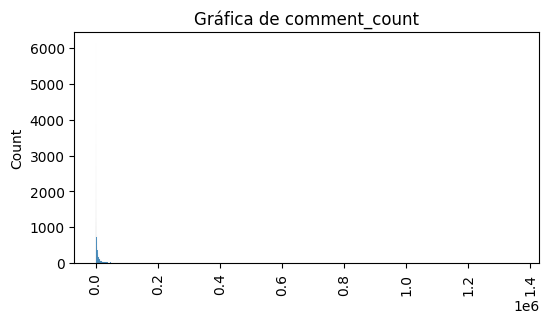

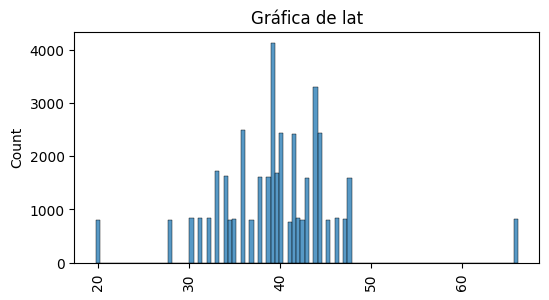

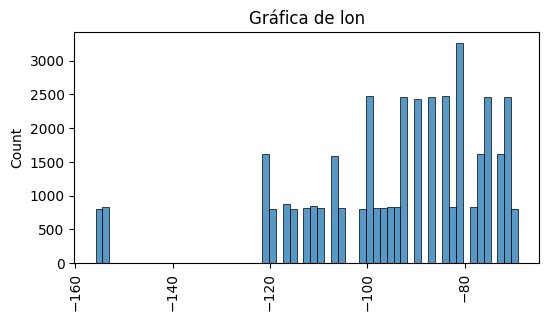

In [71]:
# Distribución para todas las varibles numericas 
for var_num in df.select_dtypes(np.number):  
    plt.figure(figsize=(6, 3), dpi= 100)
    sns.histplot(x=var_num, data=df).set(title=f'Gráfica de {var_num}', xlabel=None)
    plt.xticks(rotation=90)
    plt.show()

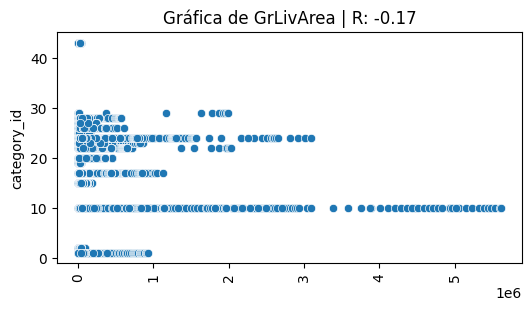

In [32]:
#Graficar una variable numerica contra una varible objetivo 
corr = df[['likes', 'category_id']].corr().loc['likes', 'category_id']
plt.figure(figsize=(6, 3), dpi= 100)
sns.scatterplot(x=df['likes'], y=df['category_id']).set(title=f'Gráfica de GrLivArea | R: {corr:.2}', xlabel=None)
plt.xticks(rotation=90)
plt.show()

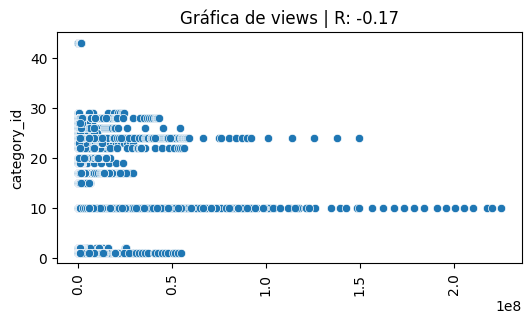

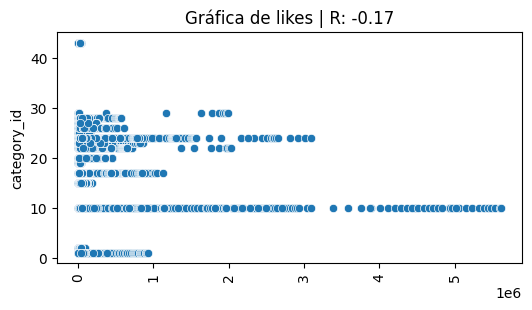

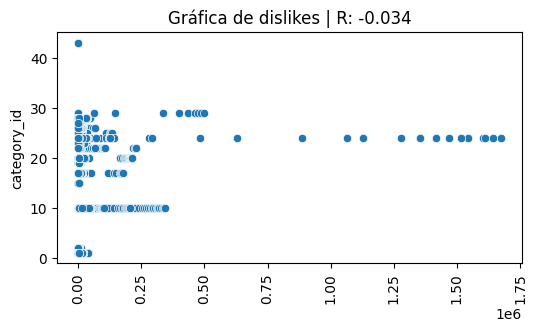

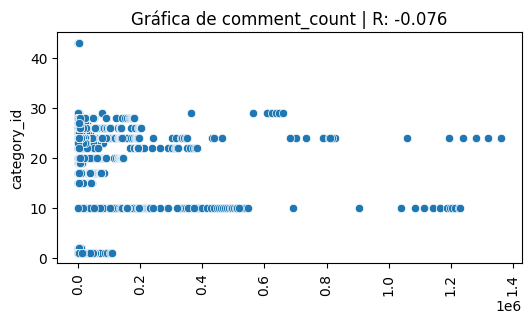

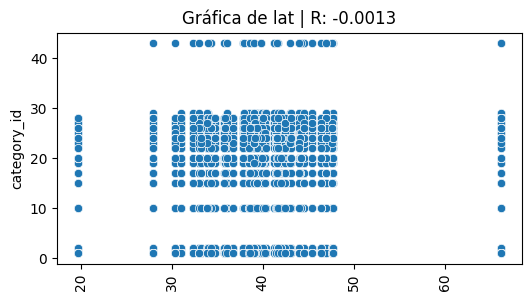

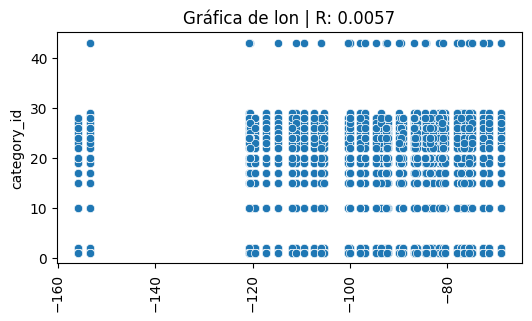

In [33]:
# Graficar variables numéricas contra la variable objetivo
for var_num in df.select_dtypes(np.number).columns: 
    target_var = 'category_id'
    corr = df[[var_num, target_var]].corr().loc[var_num, target_var]
    if var_num == target_var:
        continue
    try:
        plt.figure(figsize=(6, 3), dpi= 100)
        sns.scatterplot(x=df[var_num], y=df[target_var]).set(title=f'Gráfica de {var_num} | R: {corr:.2}', xlabel=None)
        plt.xticks(rotation=90)
        plt.show()
    except:
        print(f"Problems with column: {var_num}")
        pass

2. PARA LAS VARIABLES CATEGORICAS, SE VA LISTAR CADA UNA DE ELLAS Y SE VA DETERMINAR SU FRECUENCIA

In [34]:
# Variables categóricas
df.select_dtypes('object').columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'description', 'state', 'geometry'],
      dtype='object')

In [35]:
# Describir variables categóricas incluyendo frecuencia de categoría más común
df.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,state,geometry
count,40949,40949,40949,40949,40949,40949,40949,40379,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6901,50,50
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...,North Carolina,POINT (-80.793457 35.782169)
freq,30,200,30,203,50,1535,30,58,888,888


In [36]:
# Lista de variables categóricas y sus categorías
df.select_dtypes('object').apply(lambda x: x.unique())

video_id          [2kyS6SvSYSE, 1ZAPwfrtAFY, 5qpjK5DgCt4, puqaWr...
trending_date     [17.14.11, 17.15.11, 17.16.11, 17.17.11, 17.18...
title             [WE WANT TO TALK ABOUT OUR MARRIAGE, The Trump...
channel_title     [CaseyNeistat, LastWeekTonight, Rudy Mancuso, ...
publish_time      [2017-11-13T17:13:01.000Z, 2017-11-13T07:30:00...
tags              [SHANtell martin, last week tonight trump pres...
thumbnail_link    [https://i.ytimg.com/vi/2kyS6SvSYSE/default.jp...
description       [SHANTELL'S CHANNEL - https://www.youtube.com/...
state             [Utah, Nevada, Delaware, Michigan, Florida, We...
geometry          [POINT (-111.950684 39.41922), POINT (-117.224...
dtype: object

In [37]:
# Lista de variables categóricas y frecuencia de sus categorías
df.select_dtypes('object').apply(lambda x: x.value_counts().to_dict())

video_id          {'j4KvrAUjn6c': 30, '8h--kFui1JA': 29, 'QBL8IR...
trending_date     {'17.14.11': 200, '18.16.04': 200, '18.01.04':...
title             {'WE MADE OUR MOM CRY...HER DREAM CAME TRUE!':...
channel_title     {'ESPN': 203, 'The Tonight Show Starring Jimmy...
publish_time      {'2018-05-18T14:00:04.000Z': 50, '2018-05-06T1...
tags              {'[none]': 1535, 'ABC|"americanidol"|"idol"|"a...
thumbnail_link    {'https://i.ytimg.com/vi/j4KvrAUjn6c/default.j...
description       {'► Listen LIVE: http://power1051fm.com/\n► Fa...
state             {'North Carolina': 888, 'Nevada': 874, 'Georgi...
geometry          {'POINT (-80.793457 35.782169)': 888, 'POINT (...
dtype: object

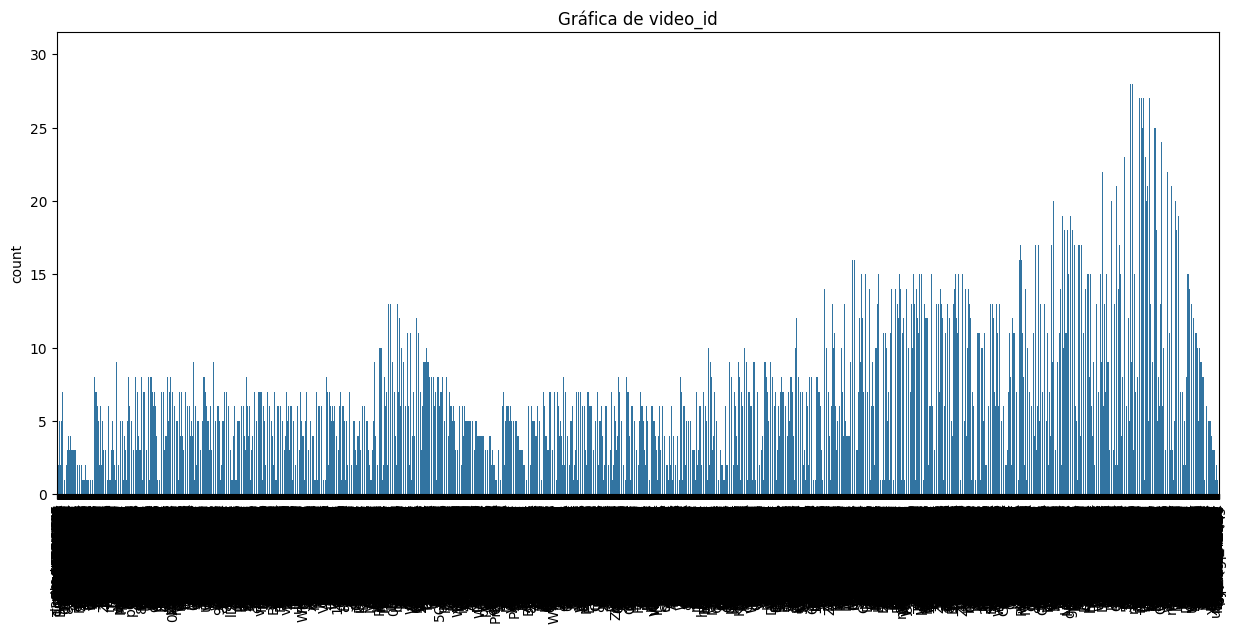

In [84]:
# Graficar variable categórica
plt.figure(figsize=(15, 6), dpi= 100)
sns.countplot(x='video_id', data=df).set(title=f'Gráfica de video_id', xlabel=None)
plt.xticks(rotation=90)
plt.show()

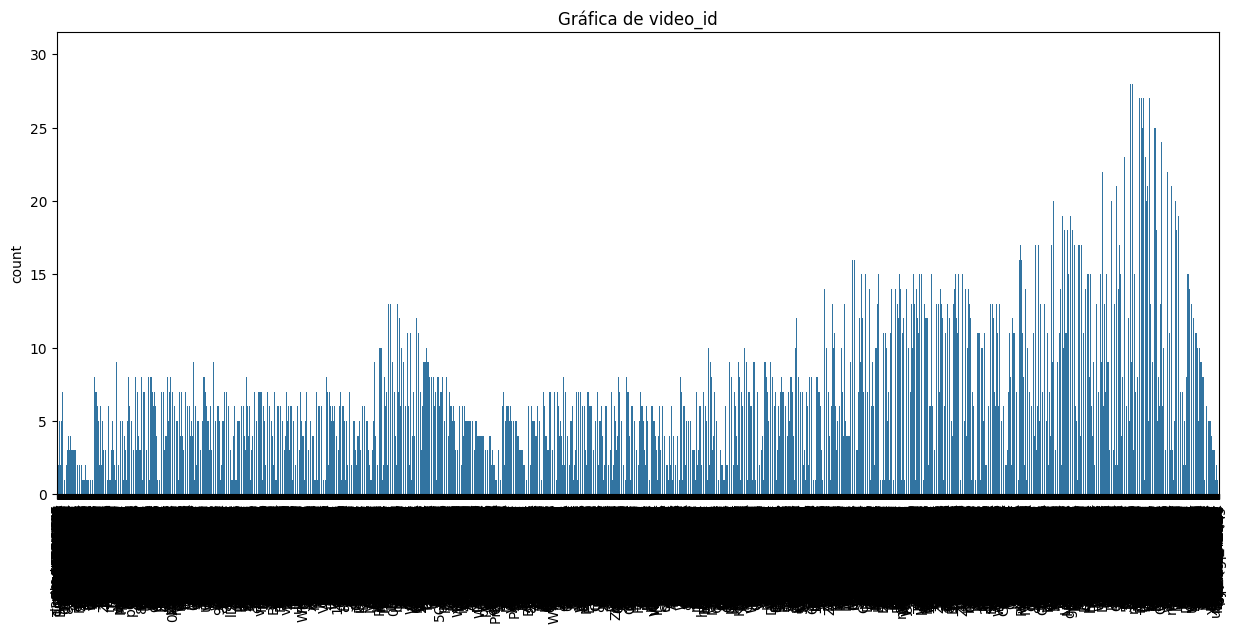

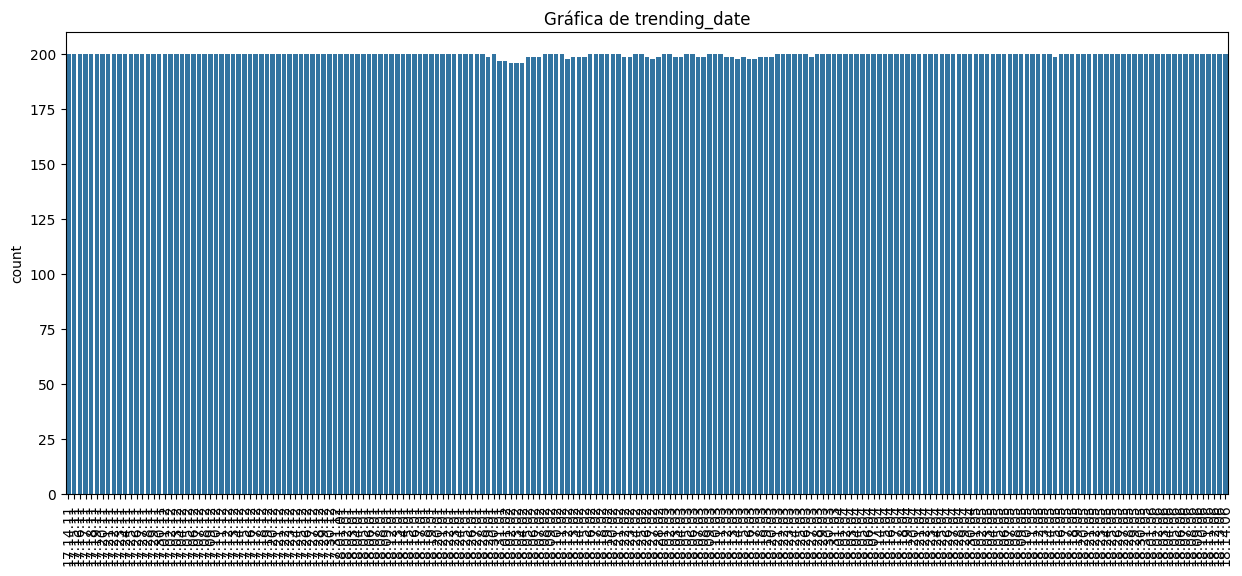

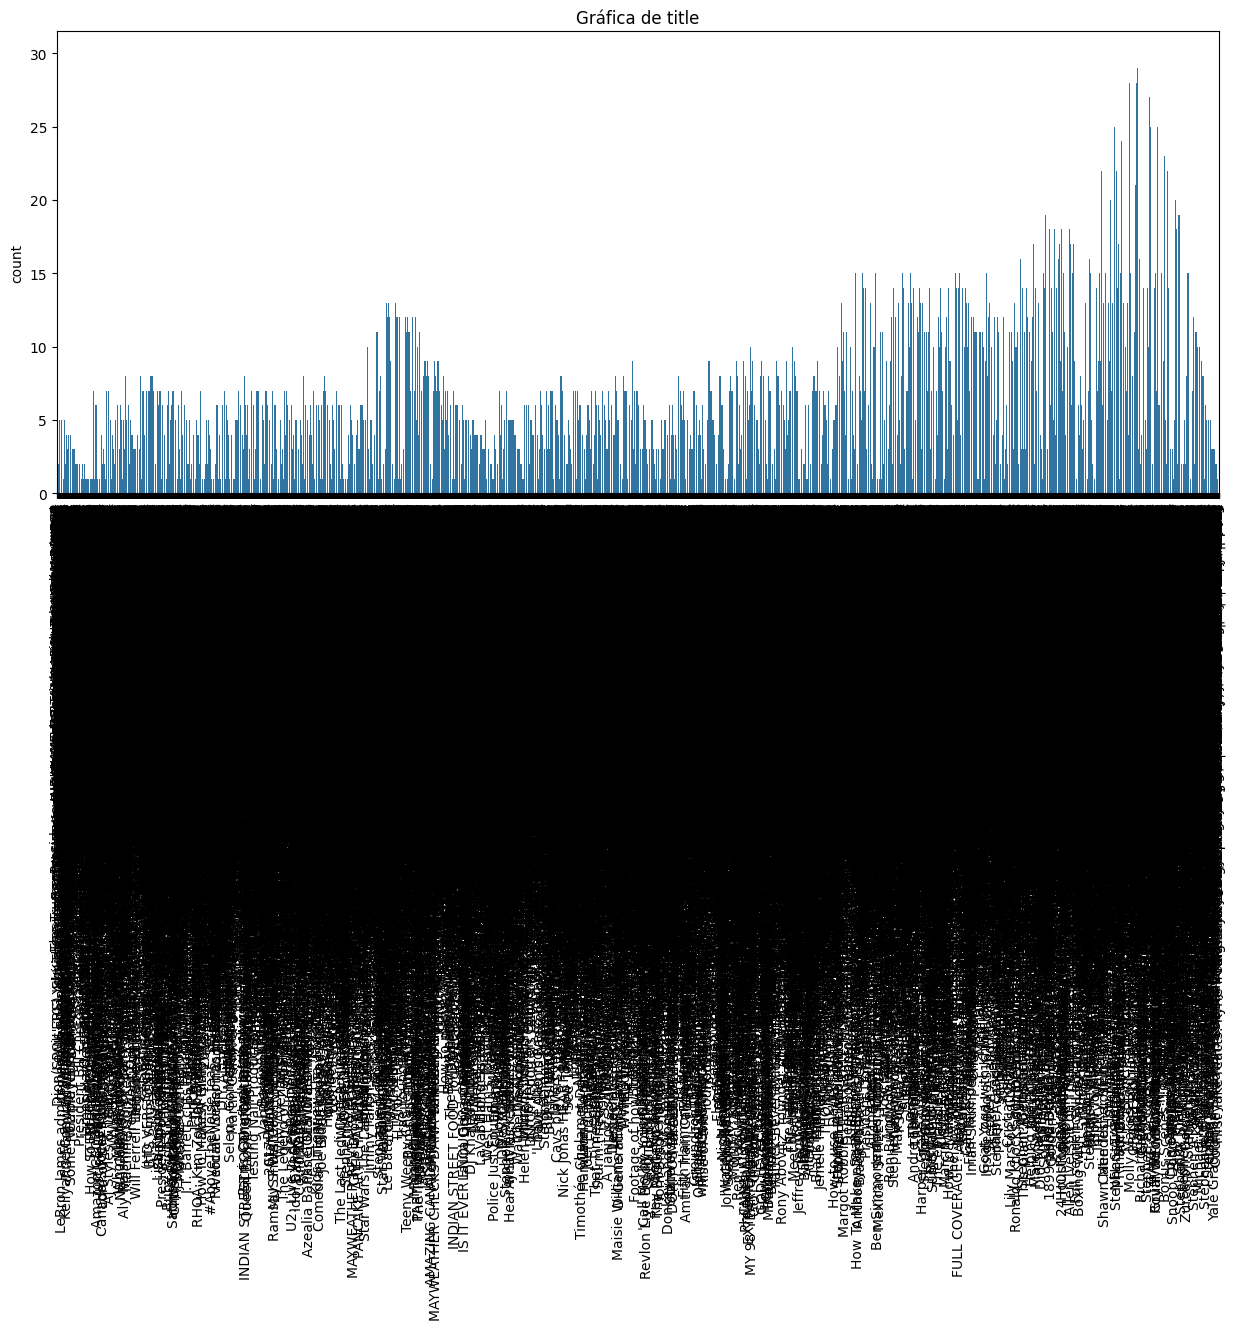

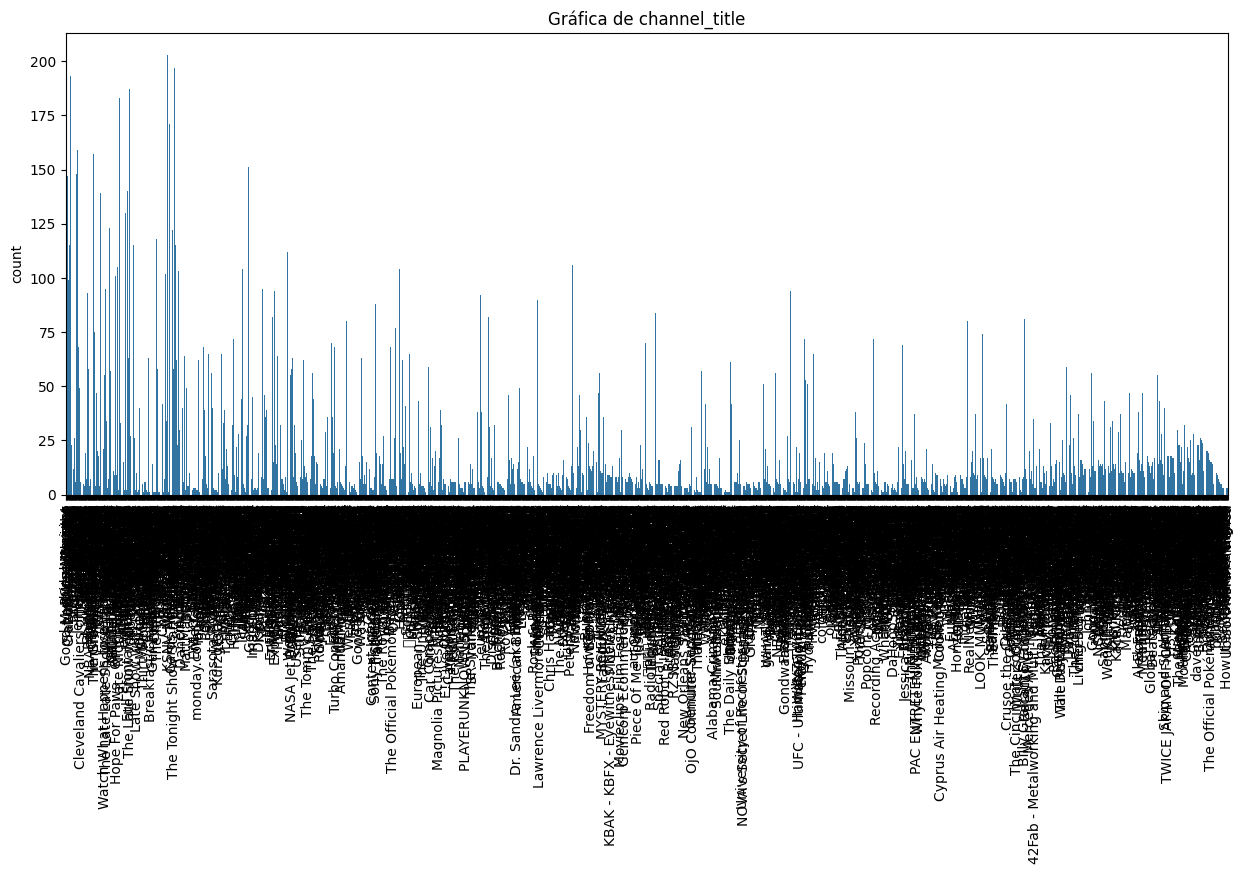

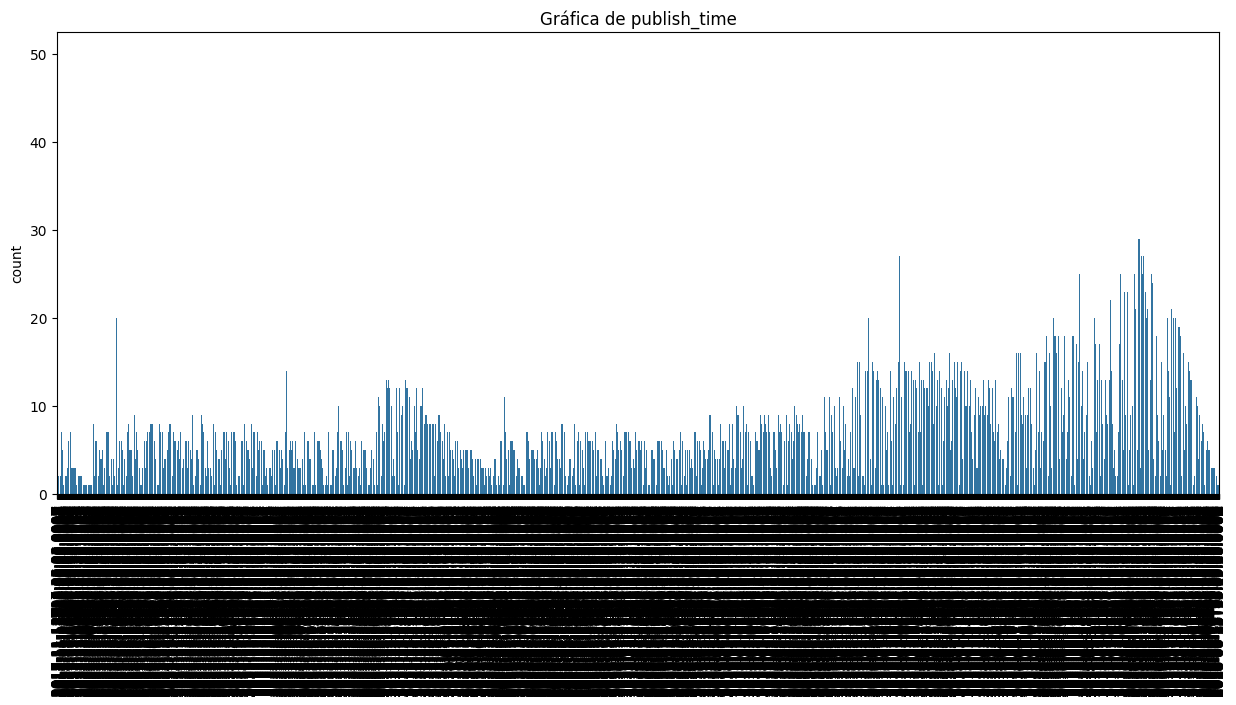

ValueError: 
BuzzFeed|"BuzzFeedBlue"|"BuzzFeed Blue"|"Blue"|"worth it lifestyle"|"steven lim"|"worth it"|"singapore airlines"|"singapore"|"airlines"|"first class suite"|"first class"|"business class"|"airplanes"|"planes"|"suite"|"luxury"|"double suite"|"beds"|"toulouse"|"jfk"|"france"|"annie jeong"|"lifestyle"|"a380"|"exclusive"|"air bus"|"double decker"|"airplane"|"suites"|"new"|"$$$"|"$ vs $$$"|"$24000"
                                                                                                                                                                                                                                                                                                                                                                                   ^
ParseException: Expected end of text, found '$'  (at char 371), (line:1, col:372)

<Figure size 1500x600 with 1 Axes>

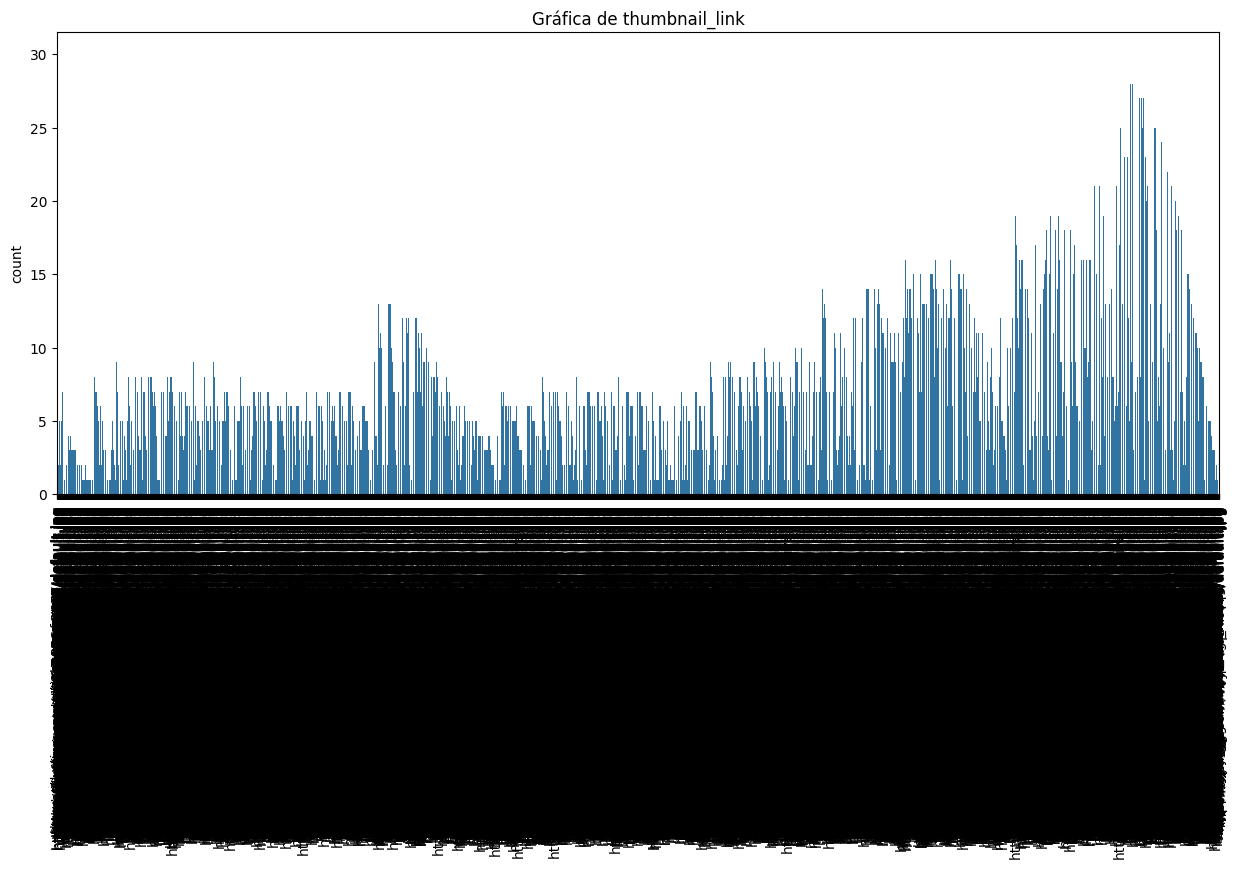

ValueError: 
Hello Everyone! \n\nI forgot to mention that I sew the back down with a needle and thread. but this wig also comes with combs in the inside. \n\nThis hair is a Brazilian Full lace wig from @BangsNBrows \nProducts I used: \n\nGhost Bond\nThe brush I used for my baby hair is also sold at target. Here is the link: https://www.target.com/p/camryn-s-bff-soft-bristles-hair-brushes-colors-may-vary/-/A-51121178?ref=tgt_adv_XS000000&AFID=google_pla_df&CPNG=PLA_Health+Beauty+Shopping_Brand_Competitor&adgroup=SC_Health+Beauty&LID=700000001170770pgs&network=g&device=c&location=9004041&gclid=EAIaIQobChMI-9-oq-my1wIVBbbACh2VkQuEEAQYAiABEgK9gvD_BwE&gclsrc=aw.ds\n\nTresemme moose \nGot2B glue (amazon)\nElectric hot comb\nFlat iron (Not sure where its from) \n\n\n\n♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ \n\n\nDISCOUNT CODES: \n\n\nPhone Case: Velvet Caviar \nwww.VelvetCaviar.com\nUse code: “AALIYAHXO” for a cute discount! $$ \n\nArtist Couture\nArtistcouture.com\nUse code “Aaliyah” at checkout for $$ off \n\n♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ \n\n▷ CONNECT WITH ME!\nFOR PROMOTION/ BRAND COLLABORATION ‣ Jennifer@thejgoagency.com\nTWITTER ‣ http://www.twitter.com/AaliyahJay\nINSTAGRAM ‣ https://instagram.com/AaliyahJay\nSNAPCHAT ‣ msaaliyahjay\n\n\n▷ OTHER VIDEOS YOU MIGHT WANT TO SEE:\nEYEBROW ROUTINE » https://www.youtube.com/watch?v=fxDxb7ljO9g\nUPDATED MAKEUP ROUTINE » https://www.youtube.com/watch?v=Yleg6u9Pang\nSTORY TIME » https://www.youtube.com/watch?v=FTuN-PCL6mA
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 910), (line:1, col:911)

<Figure size 1500x600 with 1 Axes>

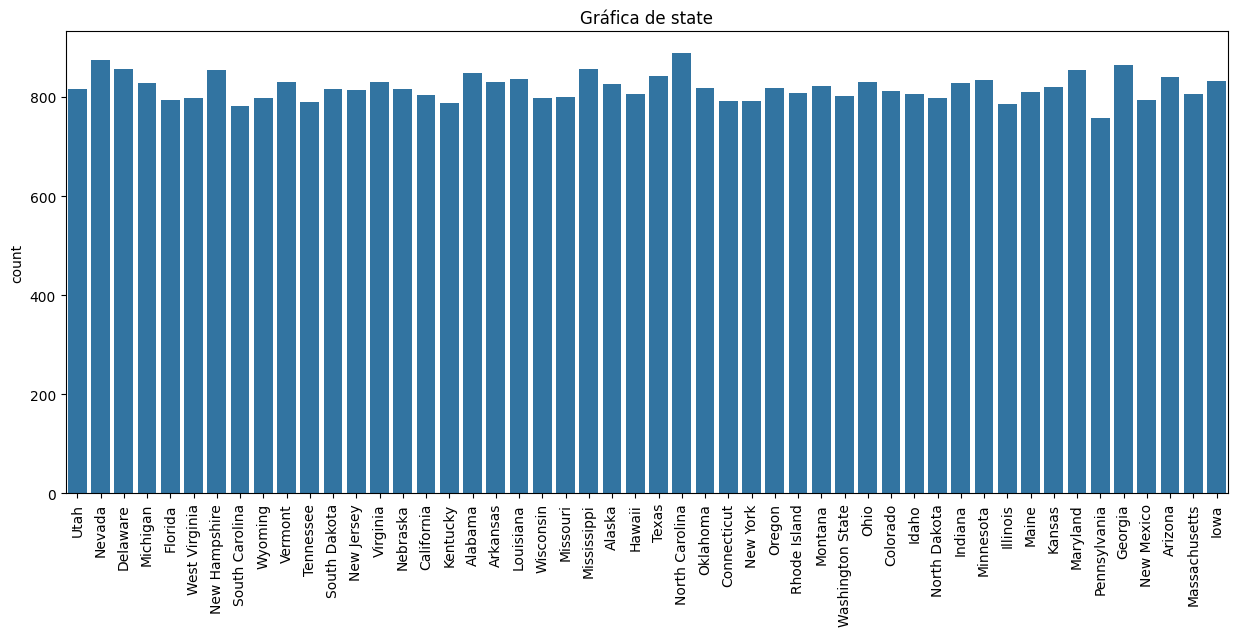

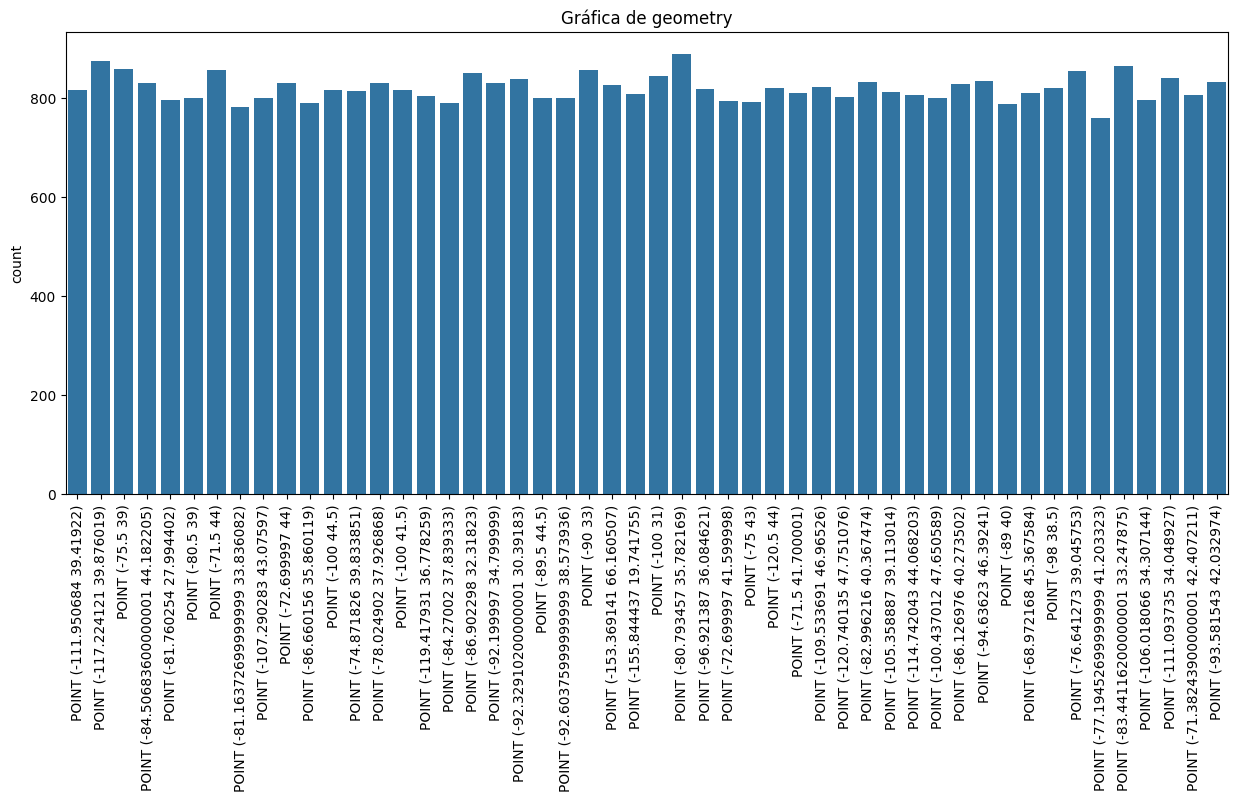

In [85]:
# Graficar variables categóricas
for var_cat in df.select_dtypes('object'):  
    plt.figure(figsize=(15, 6), dpi= 100)
    sns.countplot(x=var_cat, data=df).set(title=f'Gráfica de {var_cat}', xlabel=None)
    plt.xticks(rotation=90)
    plt.show()

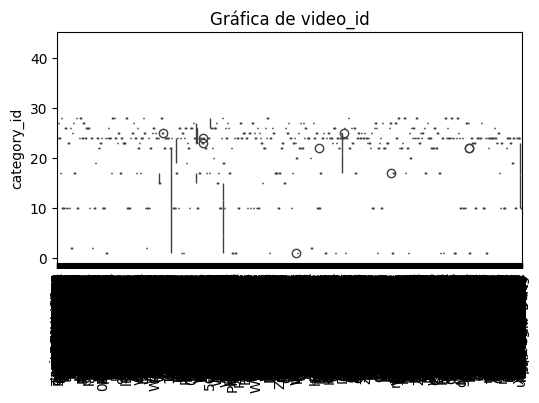

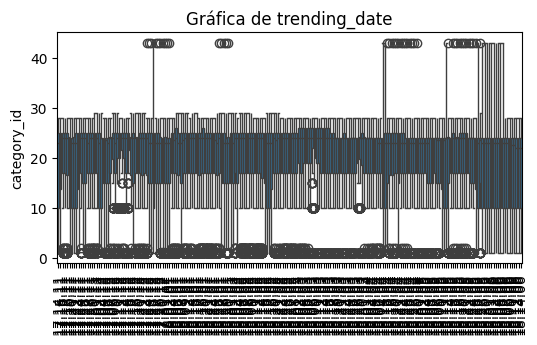

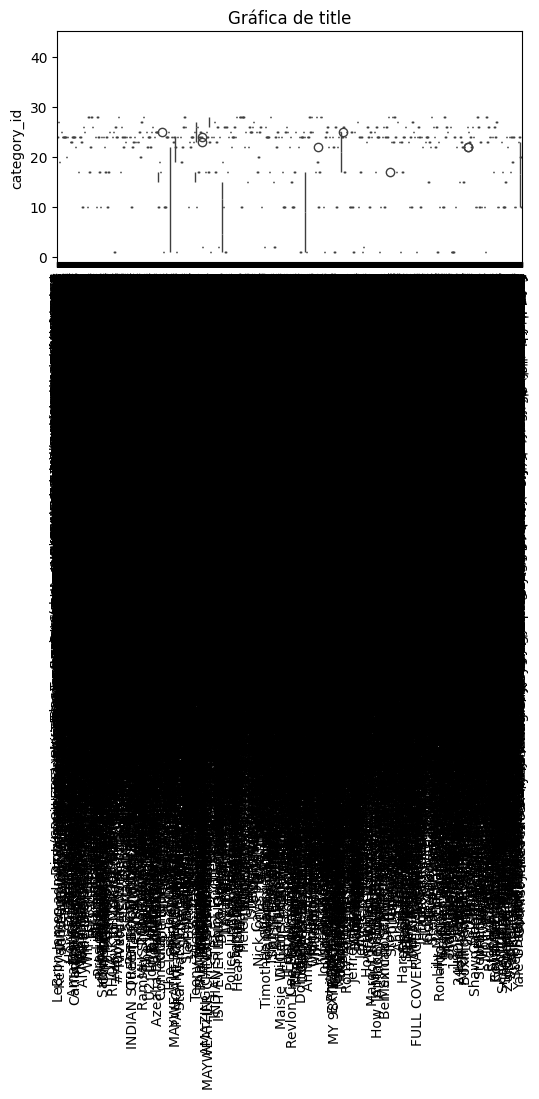

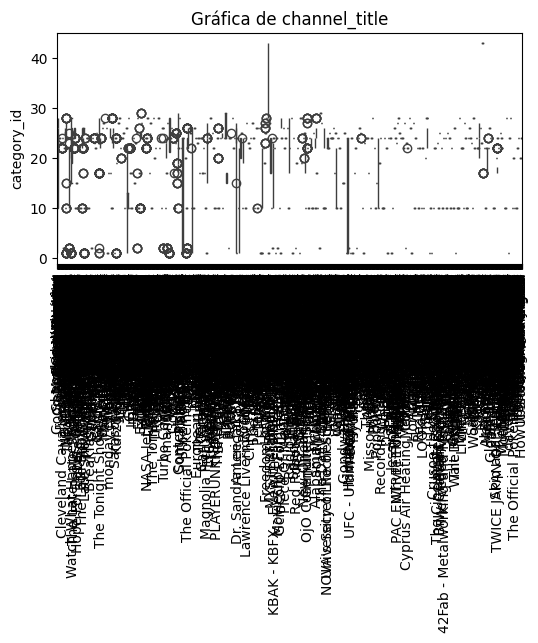

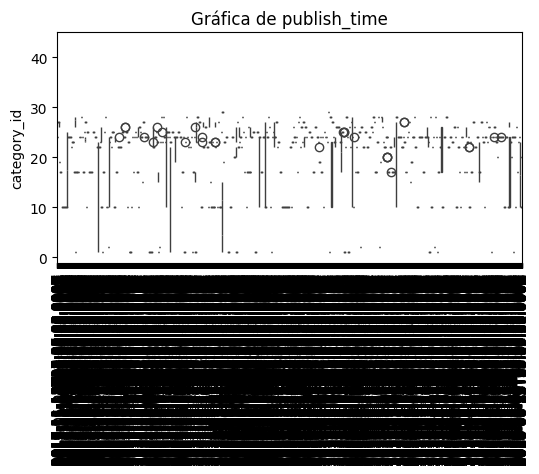

ValueError: 
BuzzFeed|"BuzzFeedBlue"|"BuzzFeed Blue"|"Blue"|"worth it lifestyle"|"steven lim"|"worth it"|"singapore airlines"|"singapore"|"airlines"|"first class suite"|"first class"|"business class"|"airplanes"|"planes"|"suite"|"luxury"|"double suite"|"beds"|"toulouse"|"jfk"|"france"|"annie jeong"|"lifestyle"|"a380"|"exclusive"|"air bus"|"double decker"|"airplane"|"suites"|"new"|"$$$"|"$ vs $$$"|"$24000"
                                                                                                                                                                                                                                                                                                                                                                                   ^
ParseException: Expected end of text, found '$'  (at char 371), (line:1, col:372)

<Figure size 600x300 with 1 Axes>

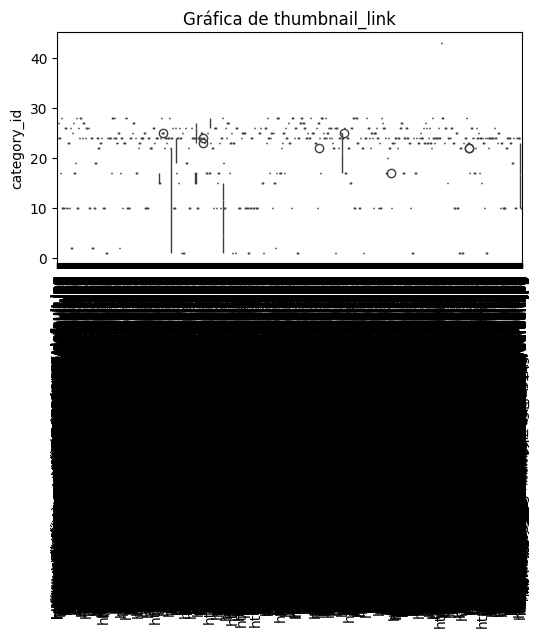

ValueError: 
Hello Everyone! \n\nI forgot to mention that I sew the back down with a needle and thread. but this wig also comes with combs in the inside. \n\nThis hair is a Brazilian Full lace wig from @BangsNBrows \nProducts I used: \n\nGhost Bond\nThe brush I used for my baby hair is also sold at target. Here is the link: https://www.target.com/p/camryn-s-bff-soft-bristles-hair-brushes-colors-may-vary/-/A-51121178?ref=tgt_adv_XS000000&AFID=google_pla_df&CPNG=PLA_Health+Beauty+Shopping_Brand_Competitor&adgroup=SC_Health+Beauty&LID=700000001170770pgs&network=g&device=c&location=9004041&gclid=EAIaIQobChMI-9-oq-my1wIVBbbACh2VkQuEEAQYAiABEgK9gvD_BwE&gclsrc=aw.ds\n\nTresemme moose \nGot2B glue (amazon)\nElectric hot comb\nFlat iron (Not sure where its from) \n\n\n\n♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ \n\n\nDISCOUNT CODES: \n\n\nPhone Case: Velvet Caviar \nwww.VelvetCaviar.com\nUse code: “AALIYAHXO” for a cute discount! $$ \n\nArtist Couture\nArtistcouture.com\nUse code “Aaliyah” at checkout for $$ off \n\n♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ ♡ \n\n▷ CONNECT WITH ME!\nFOR PROMOTION/ BRAND COLLABORATION ‣ Jennifer@thejgoagency.com\nTWITTER ‣ http://www.twitter.com/AaliyahJay\nINSTAGRAM ‣ https://instagram.com/AaliyahJay\nSNAPCHAT ‣ msaaliyahjay\n\n\n▷ OTHER VIDEOS YOU MIGHT WANT TO SEE:\nEYEBROW ROUTINE » https://www.youtube.com/watch?v=fxDxb7ljO9g\nUPDATED MAKEUP ROUTINE » https://www.youtube.com/watch?v=Yleg6u9Pang\nSTORY TIME » https://www.youtube.com/watch?v=FTuN-PCL6mA
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 910), (line:1, col:911)

<Figure size 600x300 with 1 Axes>

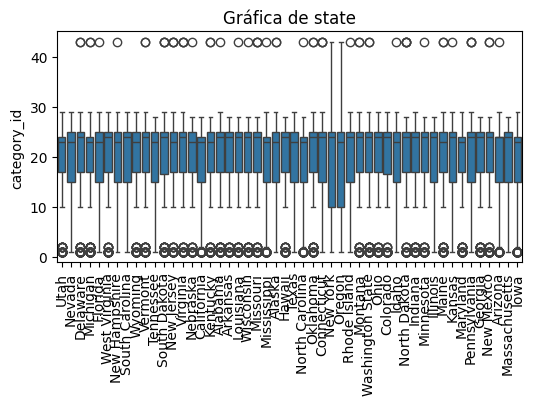

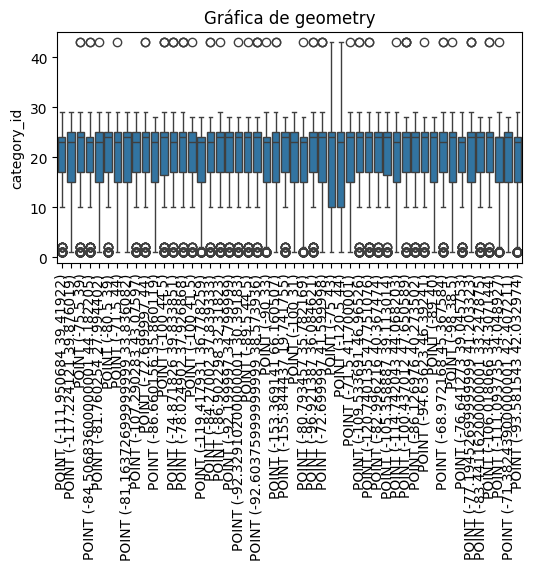

In [ ]:
# Graficar variables categóricas contra la variable objetivo
for var_cat in df.select_dtypes('object').columns:  
    target_var = 'category_id'
    if var_cat == target_var:
        continue
    plt.figure(figsize=(6, 3), dpi= 100)
    sns.boxplot(x=df[var_cat], y=df[target_var]).set(title=f'Gráfica de {var_cat}', xlabel=None) # alt: violinplot()
    plt.xticks(rotation=90)
    plt.show()

3. Analizamos los datos de la matriz de correlaciones de los datos de las varibles numemricas

In [74]:
# Matriz de correlación
corr = df.select_dtypes(include=np.number).corr()
corr


,category_id,views,likes,dislikes,comment_count,lat,lon
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,-0.001326,0.005743
views,-0.168231,1.000000,0.849177,0.472213,0.617621,-0.007908,0.000853
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.003861,0.002853
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,0.006940,-0.001792
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,0.003646,0.001306
lat,-0.001326,-0.007908,-0.003861,0.006940,0.003646,1.000000,-0.100978
lon,0.005743,0.000853,0.002853,-0.001792,0.001306,-0.100978,1.000000


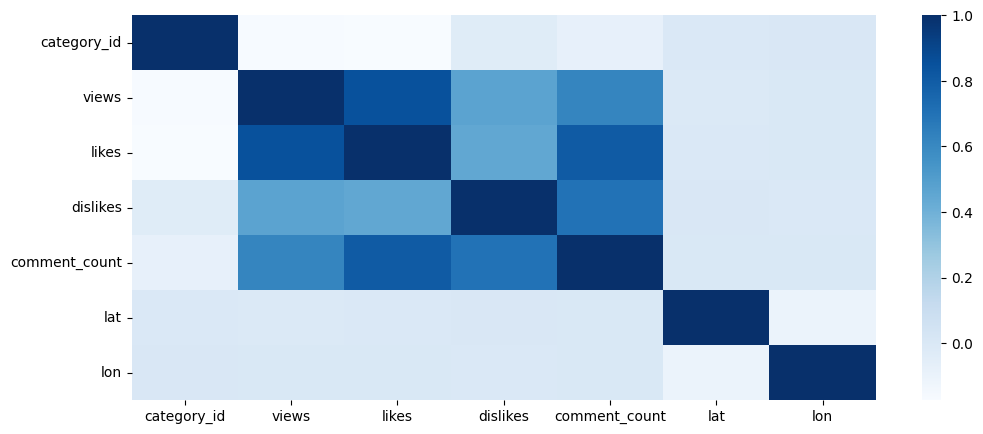

In [75]:
# Mapa de calor de matriz de correlación
plt.figure(figsize=(12, 5), dpi= 100)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Blues", 
        annot=False);

In [76]:
# Lista de pares de correlaciones (sin la diagonal)
corr_unique_pairs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
df_corr_pairs = pd.DataFrame(corr_unique_pairs, columns=['Corr'])
df_corr_pairs

Corr
views         likes          0.849177
likes         comment_count  0.803057
dislikes      comment_count  0.700184
views         comment_count  0.617621
              dislikes       0.472213
likes         dislikes       0.447186
dislikes      lat            0.006940
category_id   lon            0.005743
comment_count lat            0.003646
likes         lon            0.002853
comment_count lon            0.001306
views         lon            0.000853
category_id   lat           -0.001326
dislikes      lon           -0.001792
likes         lat           -0.003861
views         lat           -0.007908
category_id   dislikes      -0.033547
              comment_count -0.076307
lat           lon           -0.100978
category_id   views         -0.168231
              likes         -0.173921

In [77]:
# Correlación arriba de 0.70
threshold = 0.70
mask = df_corr_pairs['Corr'].abs() > threshold
df_high_corr = df_corr_pairs[mask]
df_high_corr

,,Corr
views,likes,0.849177
likes,comment_count,0.803057
dislikes,comment_count,0.700184


In [81]:
# Correlaciones con variable objetivo 'SalePrice'
df_corr_sales = corr.loc['category_id'].sort_values(ascending=False).drop(index='category_id')
df_corr_sales

lon              0.005743
lat             -0.001326
dislikes        -0.033547
comment_count   -0.076307
views           -0.168231
likes           -0.173921
Name: category_id, dtype: float64

In [82]:
df_high_corr

,,Corr
views,likes,0.849177
likes,comment_count,0.803057
dislikes,comment_count,0.700184


In [83]:
df_corr_sales.index

Index(['lon', 'lat', 'dislikes', 'comment_count', 'views', 'likes'], dtype='object')

PREPARACION DE LOS DATOS